In [ ]:
#this is for converitng our normal fits to fits of each of the three bands i.e. RGB
import numpy as np
from astropy.io import fits
from skimage import exposure

def process_band(data, method='hist'):

    if method == 'hist':
        return exposure.equalize_hist(data)
    elif method == 'adapthist':
        return exposure.equalize_adapthist(data, clip_limit=0.03)
    elif method == 'gamma':
        gamma = 0.5
        data = exposure.rescale_intensity(data, in_range='image')
        return np.power(data, gamma)
    else:
        raise ValueError("Unknown method")

def create_separate_band_fits(input_fits_file, output_fits_files):
    """
    Create separate FITS files for each RGB band from a single FITS image.

    :param input_fits_file: Path to the input single-band FITS file.
    :param output_fits_files: List of paths to save the output FITS files for each band.
    """
    if len(output_fits_files) != 3:
        raise ValueError("Output files list must contain exactly three file paths.")
    data = fits.getdata(input_fits_file)
    red_band = process_band(data, method='hist')
    green_band = process_band(data, method='adapthist')
    blue_band = process_band(data, method='gamma')
    fits.writeto(output_fits_files[0], red_band, overwrite=True)
    fits.writeto(output_fits_files[1], green_band, overwrite=True)
    fits.writeto(output_fits_files[2], blue_band, overwrite=True)
input_fits_file = '/content/output_images.fits'
output_fits_files = [
    'path_to_red_band_fits_file.fits',
    'path_to_green_band_fits_file.fits', #idhar put the paths in order of Red green blue
    'path_to_blue_band_fits_file.fits'
]
create_separate_band_fits(input_fits_file, output_fits_files)


FileNotFoundError: [Errno 2] No such file or directory: '/content/output_images.fits'

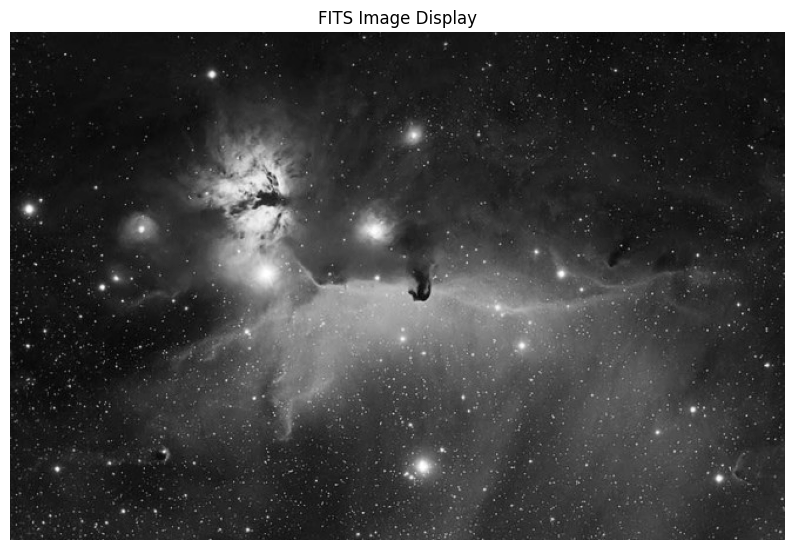

In [ ]:
import matplotlib.pyplot as plt
from astropy.io import fits

def display_fits_image(fits_file, title="FITS Image"):

    with fits.open(fits_file) as hdul:

        image_data = hdul[0].data


    plt.figure(figsize=(10, 10))
    plt.imshow(image_data, cmap='grey', origin='lower')
    plt.title(title)
    plt.axis('off')
    plt.show()

fits_file = '/content/output_images.fits'
display_fits_image(fits_file, title="FITS Image Display")


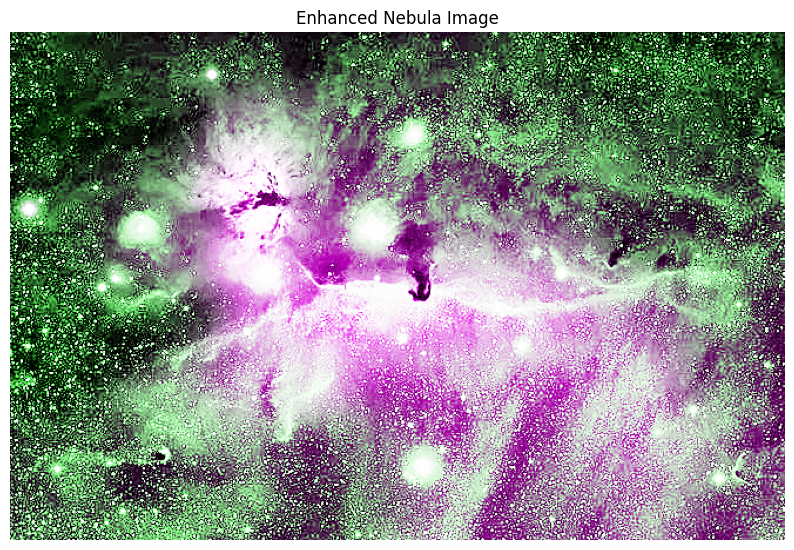

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from skimage import exposure, filters
from astropy.convolution import convolve, Gaussian2DKernel

def enhance_color_bands(fits_files, object_type):
    """
    Enhance and combine color bands into a single RGB image.

    :param fits_files: List of paths to FITS files corresponding to different bands.
    :param object_type: Type of astronomical object (e.g., 'black_hole', 'galaxy', 'nebula', 'star').
    :return: RGB image array.
    """
    bands = [fits.getdata(f) for f in fits_files]
    if object_type == 'black_hole':
        return enhance_black_hole_color(bands)
    elif object_type == 'constellation':
        return enhance_constellation_color(bands)
    elif object_type == 'galaxy':
        return enhance_galaxy_color(bands)
    elif object_type == 'nebula':
        return enhance_nebula_color(bands)
    elif object_type == 'cosmos':
        return enhance_cosmos_color(bands)
    elif object_type == 'planet':
        return enhance_planet_color(bands)
    elif object_type == 'star':
        return enhance_star_color(bands)
    else:
        raise ValueError("Unknown object type")

def preprocess_band(band):
    """
    Preprocess a single band: apply normalization and contrast stretching.

    :param band: 2D array of the FITS band.
    :return: Processed 2D array.
    """
    band = exposure.rescale_intensity(band, in_range='image', out_range=(0, 1))
    band = exposure.equalize_hist(band)
    return band

def enhance_black_hole_color(bands):
    """
    Enhance and combine color bands for a black hole.
    """
    red, green, blue = [preprocess_band(band) for band in bands]

    # Combine bands into an RGB image
    rgb_image = np.dstack([red, green, blue])
    return rgb_image

def enhance_constellation_color(bands):
    """
    Enhance and combine color bands for star constellations.
    """
    red, green, blue = [preprocess_band(band) for band in bands]
    red = filters.unsharp_mask(red,radius=1,amount=2)
    green = filters.unsharp_mask(green, radius=1, amount=2)
    blue = filters.unsharp_mask(blue, radius=1, amount=2)
    rgb_image = np.dstack([red, green, blue])
    return rgb_image

def enhance_galaxy_color(bands):
    """
    Enhance and combine color bands for a galaxy.
    """
    red, green, blue = [preprocess_band(band) for band in bands]
    red = filters.unsharp_mask(red, radius=1, amount=1.5)
    green = filters.unsharp_mask(green,radius=1, amount=1.5)
    blue = filters.unsharp_mask(blue,radius=1, amount=1.5)
    rgb_image = np.dstack([red,green,blue])
    return rgb_image

def enhance_nebula_color(bands):
    """
    Enhance and combine color bands for a nebula.
    """
    red, green, blue = [preprocess_band(band) for band in bands]
    red = filters.unsharp_mask(red, radius=1, amount=2)
    green = filters.unsharp_mask(green, radius=1, amount=2)
    blue = filters.unsharp_mask(blue, radius=1, amount=2)
    rgb_image = np.dstack([red, green, blue])
    return rgb_image

def enhance_cosmos_color(bands):
    """
    Enhance and combine color bands for a wide-field cosmos image.
    """
    red, green, blue = [preprocess_band(band) for band in bands]
    kernel = Gaussian2DKernel(x_stddev=1)
    red_smooth = convolve(red, kernel)
    green_smooth = convolve(green, kernel)
    blue_smooth = convolve(blue, kernel)
    rgb_image = np.dstack([red_smooth, green_smooth, blue_smooth])
    return rgb_image

def enhance_planet_color(bands):
    """
    Enhance and combine color bands for a planet.
    """
    red, green, blue = [preprocess_band(band) for band in bands]
    red = filters.unsharp_mask(red, radius=1, amount=1.5)
    green = filters.unsharp_mask(green, radius=1, amount=1.5)
    blue = filters.unsharp_mask(blue, radius=1, amount=1.5)
    rgb_image = np.dstack([red, green, blue])
    return rgb_image

def enhance_star_color(bands):
    """
    Enhance and combine color bands for star fields.
    """
    red, green, blue = [preprocess_band(band) for band in bands]
    red_filtered = filters.unsharp_mask(red, radius=1, amount=2)
    green_filtered = filters.unsharp_mask(green, radius=1, amount=2)
    blue_filtered = filters.unsharp_mask(blue, radius=1, amount=2)
    rgb_image = np.dstack([red_filtered, green_filtered, blue_filtered])
    return rgb_image

def display_image(image, title="Enhanced Image"):
    """
    Display an RGB image using matplotlib.

    :param image: 3D array of the RGB image.
    :param title: Title of the plot.
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(image, origin='lower')
    plt.title(title)
    plt.axis('off')
    plt.show()


object_type = 'nebula' #feed this from the model

fits_files = [
    '/content/path_to_red_band_fits_file.fits',
    '/content/path_to_green_band_fits_file.fits', #idhar agin same order
    '/content/path_to_blue_band_fits_file.fits'
]

enhanced_image= enhance_color_bands(fits_files, object_type)


display_image(enhanced_image, title=f"Enhanced {object_type.replace('_',' ').capitalize()} Image")